Text(0,0.5,'relative error')

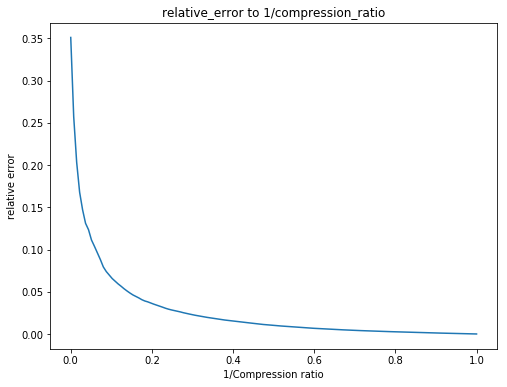

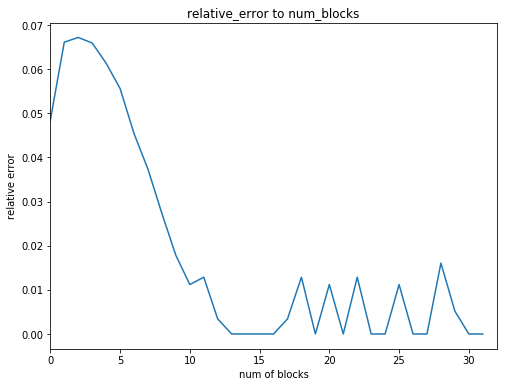

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 19 14:16:34 2019

@author: shaox16
"""
import numpy as np
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = np.floor(0.2989 * r + 0.5870 * g + 0.1140 * b)
    return gray

def meanX(dataX):
    return np.mean(dataX,axis=0)

def my_pca(X,n_components):
    average = meanX(X) 
    m, n = np.shape(X)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = X - avgs
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
    featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue) #依照featValue进行从大到小排序
    finalData = []
    selectVec = np.matrix(featVec.T[index[:n_components]]) #这里要转置，和下面SVD对比
    finalData = (data_adjust * selectVec.T).real
    reconData = (finalData * selectVec) + average
    return reconData

p = mpimg.imread('portrait.jpg') 
p=rgb2gray(p) 
m,n=np.shape(p)

#下面分析图像质量和压缩比的关系
e = [0 for i in range(n)] 
for i in range(n):
    p_pca=my_pca(p,i)
    delta=abs(p-p_pca)
    s=sum(sum(p).T)
    delta_sum=sum(sum(delta).T)
    b=delta_sum/s
    e[i]=b[0,0]
xx=np.linspace(0,1,n)
fig = plt.figure(1, figsize=(8, 6))
plt.title('relative_error to 1/compression_ratio')
plt.plot(xx,e)
plt.xlabel("1/Compression ratio")
plt.ylabel("relative error")

K_p=32;
e = [0 for i in range(K_p)]
for i in range(K_p):
    k=i+1
    block=int(np.floor(m/k))
    for j in range(k):
        if(j==i):
            piece=p[block*j:m-1,:]
        else:
            piece=p[block*j:block*(j+1),:]
        piece_pca=my_pca(piece,20)
        delta=abs(piece-piece_pca) 
        s=sum(sum(piece).T)
        delta_sum=sum(sum(delta).T)
        b=delta_sum/s
        err=b[0,0]
        e[i]=e[i]+err
xx=[i for i in range(K_p)]
fig = plt.figure(2, figsize=(8, 6))
plt.title('relative_error to num_blocks')
plt.xlim(0, K_p)
plt.plot(xx,e)
plt.xlabel("num of blocks")
plt.ylabel("relative error")
#plt.imshow(p) # 显示原图片
#plt.imshow(p_pca) # 显示压缩图片
#plt.axis('off') # 不显示坐标轴
#plt.show()


# T-3

## 与压缩比的关系

主成分个数越少，压缩比越大，呈反比关系

分块数目与压缩比的关系不确定，一般来讲，保持主成分数目不变化，则分块数目越少，压缩比越大。我的做法是保持压缩维度不变化，对另一维度进行划分分块，这样依然会使得压缩比下降，因为要储存的特征向量变多了。

## 评估图像质量

我采用的方法是将恢复图像与原图做差，差矩阵各元素绝对值之和除以原图像各元素之和作为相对误差。

相对误差越大，则恢复图像质量越糟糕；反之图像质量越好。

当然，这并不符合生理上认识的“图像质量”，那是很复杂的定义。

## 主成分个数和分块对图像质量的影响

注：这里讨论的压缩比不考虑特征向量和平均值向量的存储

如图所示，主成分数量越多（压缩比的倒数越大），相对误差越小，图像质量越好

如图所示，一般来讲，分块数目增多时，相对误差先增大后减小，也就是说，适当分块有益于恢复图像，但是也不是分得越多越好。当分块数目过多时，边际收益递减（并且有波动）